# EEG preprocessing pipeline using MNE-python package

In [1]:
# Import relevant packages
import os
import numpy as np
import mne
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Define data file locations etc
homeDir = '/Users/yvonnefonken/Documents/Oxford/Research Projects/EEG/Catch4Critters_2019/EEGdata/'
os.chdir(homeDir)

# set montage file
montage = homeDir + "montage/m.elp"
subjects = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
           'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 
            'S29', 'S30'] # Only analyzing 18-30 for now

filenames = ['s01_Catch4Critters.set','s02_Catch4Critters.set' ,'s03_Catch4Critters.set' ,'s04_Catch4Critters.set',
             's05_Catch4Critters.set', 's06_Catch4Critters.set','s07_Catch4Critters.set' ,'s08_Catch4Critters.set' ,
             's09_Catch4Critters.set','s10_Catch4Critters.set', 's11_Catch4Critters.set','s12_Catch4Critters.set' ,
             's13_Catch4Critters.set' ,'s14_Catch4Critters.set','s15_Catch4Critters.set', 's16_Catch4Critters.set',
             's17_Catch4Critters.set', 's18_Catch4Critters.set', 's19_Catch4Critters.set', 
             's20_Catch4Critters.set', 's21_Catch4Critters.set', 's22_Catch4Critters.set', 's23_Catch4Critters.set', 
             's24_Catch4Critters.set', 's25_Catch4Critters.set', 's26_Catch4Critters.set', 's27_Catch4Critters.set',
             's28_Catch4Critters.set', 's29_Catch4Critters.set', 's30_Catch4Critters.set']

metadataL = ['1_eegL.csv','2_eegL.csv' ,'3_eegL.csv' ,'4_eegL.csv','5_eegL.csv', '6_eegL.csv','7_eegL.csv' ,'8_eegL.csv' 
             ,'9_eegL.csv','10_eegL.csv', '11_eegL.csv','12_eegL.csv' ,'13_eegL.csv' ,'14_eegL.csv','15_eegL.csv', '16_eegL.csv',
             '17_eegL.csv', '18_eegL.csv', '19_eegL.csv', '20_eegL.csv', 
            '21_eegL.csv', '22_eegL.csv', '23_eegL.csv','24_eegL.csv', '25_eegL.csv', '26_eegL.csv','27_eegL.csv', 
             '28_eegL.csv', '29_eegL.csv', '30_eegL.csv']

metadataO = ['1_eegO.csv','2_eegO.csv' ,'3_eegO.csv' ,'4_eegO.csv','5_eegO.csv', '6_eegO.csv','7_eegO.csv' ,'8_eegO.csv' ,'9_eegO.csv',
             '10_eegO.csv', '11_eegO.csv','12_eegO.csv' ,'13_eegO.csv' ,'14_eegO.csv','15_eegO.csv', '16_eegO.csv', '17_eegO.csv', '18_eegO.csv', '19_eegO.csv', '20_eegO.csv', 
            '21_eegO.csv', '22_eegO.csv', '23_eegO.csv','24_eegO.csv', '25_eegO.csv', '26_eegO.csv','27_eegO.csv', 
             '28_eegO.csv', '29_eegO.csv', '30_eegO.csv']

#version = []

#['S00_experimenter', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
           #'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23']


In [3]:
# Set parameters

#filtering settings ERP data
lp = 0.1 # 
hp = 60

# downsample to this frequency
sfreq = 250

# filtering settings time-frequency data
#lpTF = 1
#hpTF = 100

#sfreqTF = 100




In [ ]:
filenames[subInd]

In [4]:
# Load data
sub = 17 # 28 is in two files, need to fix -- Learning file for sub 30 fixed. 27,21, 19 has weird looking PSD
subInd = sub -1

raw_datafile = os.path.join(homeDir, subjects[subInd], filenames[subInd])
raw = mne.io.read_raw_eeglab(raw_datafile, montage, eog=['VEOG', 'HEOG'], preload=True)
mne.io.set_eeg_reference(raw, ['RM'])

if sub == 23:
    raw.info['bads'] = ['AF8']
elif sub == 26:
    raw.info['bads'] = ['FPZ', 'FP2']
elif sub == 30:
    raw.info['bads'] = ['P2']
elif sub == 17:
    raw.info['bads'] = ['OZ']
    
raw = raw.interpolate_bads(reset_bads = False)

Reading /Users/yvonnefonken/Documents/Oxford/Research Projects/EEG/Catch4Critters_2019/EEGdata/S17/s17_Catch4Critters.fdt
Reading 0 ... 4738199  =      0.000 ...  4738.199 secs...
Applying a custom EEG reference.
Computing interpolation matrix from 61 sensor positions
Interpolating 1 sensors


In [ ]:
raw.info['ch_names']

In [ ]:
# Check power spectrum
raw.plot_psd(fmax = 60)

## Load behavioral data and align with trigger/events channel

In [5]:
# create key for event_id
event_id = {'3.0' : 3,                 #space bar to continue 
            '4.0':4,'5.0':5,'6.0':6,'7.0':7,#responses ('d', 'f', 'j', 'k')
            '20.0': 20, '30.0': 30, # target, 20 is random, 30 is predicted (orienting task)
            '21.0': 21, '22.0': 22, '23.0': 23, '24.0': 24, # random target 1,2,3,4 (animal ID is different per version)
            '31.0':31,'32.0':32,'33.0':33,'34.0':34,#predicted target 1,2,3,4 (animal ID is different per version)
            '101.0': 101, '102.0': 102, '103.0': 103, '104.0': 104, '105.0': 105, '106.0': 106, '107.0': 107, '108.0': 108, '109.0':109, '110.0': 110, # Start of scene, individual scene numbers (48 total), scene identifiers are the same across subjects
            '111.0': 111, '112.0': 112, '113.0': 113, '114.0': 114, '115.0': 115, '116.0': 116, '117.0': 117, '118.0': 118, '119.0':119, '120.0': 120,
            '121.0': 121, '122.0': 122, '123.0': 123, '124.0': 124, '125.0': 125, '126.0': 126, '127.0': 127, '128.0': 128, '129.0':129, '130.0': 130,
            '131.0': 131, '132.0': 132, '133.0': 133, '134.0': 134, '135.0': 135, '136.0': 136, '137.0': 137, '138.0': 138, '139.0':139, '140.0': 140,
            '141.0': 141, '142.0': 142, '143.0': 143, '144.0': 144, '145.0': 145, '146.0': 146, '147.0': 147, '148.0': 148, 
            '50.0': 50, # fixation cross change
            '245.0':245} # start of experiment

events = mne.events_from_annotations(raw, event_id = event_id)


Used Annotations descriptions: ['101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '20.0', '21.0', '22.0', '23.0', '24.0', '245.0', '3.0', '30.0', '31.0', '32.0', '33.0', '34.0', '4.0', '5.0', '50.0', '6.0', '7.0']


In [6]:
dfL = pd.read_csv(os.path.join(homeDir, metadataL[subInd]))
dfO = pd.read_csv(os.path.join(homeDir, metadataO[subInd]))

print(metadataL[subInd])
print(metadataO[subInd])

frames = [dfL, dfO]

df = pd.concat(frames, sort = False)

df['trialNum'] = range(0, len(df))

17_eegL.csv
17_eegO.csv


In [7]:
sceneNum = []
logTarget = 0
countTarget = 0
resp = [] # log response buttons
resp1 = []
resp2 = []
target = []
target1 = []
target2 = []
setRT = 0
RT = []
num = 0
num2 = 0
Orienting = 0 # keep track of where we are in the logfile (learning vs orienting block)
responseLog = 0

firstTrial = 1
checkResp = 0
beginStamp = 0
Delay = []
Delay1 = []
Delay2 = []


if sub == 24: # faulty trigger
    events[0][1929,2] = 50
elif sub == 4:
    events[0][728,2] = 50 # rogue trigger

for i in events[0][:,2]:
    if sub == 24:
        if len(sceneNum) == 284: # fix missing scene number trigger
            sceneNum.append(27)
    if sub == 30:
        if events[0][num,0] == 3801766:
            sceneNum.append(9)
        
    if i >100 and i <200:
        #Record scene number
        sceneNum.append(i-100)
        
        
    elif i == 50: # 50 is the fixation cross blimp that indicates the beginning of the interval
        
        beginStamp = events[0][num, 0] # log timestamp to compute actual delay
        # clean up if missing responses
        if firstTrial:
            firstTrial = 0
        else:
            if Orienting:
                if responseLog < 1:
                    RT.append(0)
                    resp.append(0)
                    resp1.append(0)
                    resp2.append(0)
                    setRT = 0

            else:
                if responseLog ==1:
                    resp2.append(0)
                elif responseLog == 0:
                    resp1.append(0)
                    resp2.append(0)
                    resp.append(0)
                    RT.append(0)
                
            
        # log targets
        countTarget = 0
        logTarget = 1
        responseLog = 0
        firstResp = 1
        
    elif i > 19 and i < 40 and logTarget:
        
        if i == 34 & Orienting:
            print(len(target))
        if i == 20: # Orienting; only one target
            target.append(i)
            setRT = events[0][num,0] # log timestamp to calculate RT
            logTarget = 0
            countTarget += 1
            Orienting = 1
            target1.append(0)
            target2.append(0)
            checkResp = 1
            Delay.append(events[0][num,0]- beginStamp)
            Delay1.append(0)
            Delay2.append(0)
        elif i == 30: # Orienting
            target.append(i)
            setRT = events[0][num,0]
            countTarget += 1
            logTarget = 0
            Orienting = 1
            target1.append(0)
            target2.append(0)
            Delay.append(events[0][num,0]- beginStamp)
            Delay1.append(0)
            Delay2.append(0)
            checkResp = 1 # make sure responses before the target do not get logged as responses
            
            
        elif i == 31 and not Orienting: # Learning blocks (include target number); two targets per scene
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            countTarget += 1
            
        elif i == 32 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            countTarget += 1
            
        elif i == 33 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            countTarget += 1
            
            
        elif i == 34 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            countTarget += 1
            
        
        elif i == 21 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
        
            countTarget += 1
            
        elif i == 22 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
                
            countTarget += 1
            
            
        elif i == 23 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            
            countTarget += 1
            
        
        elif i == 24 and not Orienting:
            if countTarget == 1:
                target2.append(i)
                Delay2.append(events[0][num,0] - beginStamp)
            else:
                target1.append(i)
                target.append(0)
                Delay1.append(events[0][num,0] - beginStamp)
            
            countTarget += 1
            
        
        if countTarget > 1:
            logTarget = 0
    
    
    elif i > 3 and i < 8:
        
        if Orienting & checkResp:
            responseLog += 1
        
        if not Orienting:
            responseLog += 1
        
        # record reaction time
        if Orienting:
            
            if setRT > 0:
                RT.append(events[0][num,0] - setRT)
                resp.append(i) # separate between 1 and 2 responses in different blocks?
                
                setRT = 0 # reset and prevent logging double responses
                resp1.append(0)
                resp2.append(0)
                checkResp = 0
                
        else:
            
            if firstResp == 1:
                resp1.append(i)
                resp.append(0) # fill up space for orienting blocks
                RT.append(0)
                firstResp = -1
               
                
            elif firstResp == -1: # make sure to not log additional button presses
                resp2.append(i) # this may log additional button presses in orienting block
                firstResp = 0
    
    if len(resp) == 120:
        print(num)
    num += 1
    
    
# Log last trial if no response
if responseLog < 1:
    RT.append(0)
    resp.append(0)
    resp1.append(0)
    resp2.append(0)
    

725
726
727
728
729
730


In [ ]:
events[0][720:730,:]

In [ ]:
Delay1

In [ ]:
df['Condition'][118:124]
#len(df)

In [ ]:
resp2[119:140]

In [ ]:
df['Answer2'][119:140]

In [8]:
# check if number of trials is correct
print(len(resp))#
print(len(resp1))
print(len(resp2))
print(len(target))#
print(len(target1))#
print(len(target2))#
print(len(sceneNum))# 
print(len(RT))#

576
576
576
576
576
576
576
576


In [9]:
# add info from trigger channel to df
df['RTlog'] = RT
df['resplog'] = resp
df['resp1log'] = resp1
df['resp2log'] = resp2
df['sceneLog'] = sceneNum
df['targetLog'] = target
df['target1Log'] = target1
df['target2Log'] = target2


In [ ]:
df.columns

In [ ]:
# check if trials are aligned correctly  - Orienting
df[['targetLog', 'Critter', 'RTlog', 'RT', 'resplog', 'Answer']][300:350]

In [ ]:
# check if trials are aligned correctly  - Learning
df[['sceneLog', 'Scene', 'resp1log', 'Answer1', 'resp2log', 'Answer2']][200:250]

## Filter data

### Required: crop data

In [10]:
# Housekeeping, filtering, and downsampling
    
# Find the first even with a real trigger code (this is because of the impedence trigger)
#f = np.min(np.where(events[:,-1] < 256))

# crop 10 seconds before the first event
tmin = raw.times[events[0][0,0]]-10
if tmin < 0: # if tmin is negative just set it at the beginning
    tmin = raw.times[0] 
# crop 10 seconds after the last event
tmax = raw.times[events[0][-1,0]]+10
if tmax > raw.times[-1]: # if tmax is bigger then the max time, just take that
    tmax = raw.times[-1]

# crop it
raw.crop(tmin=tmin, tmax=tmax)



<RawEEGLAB  |  s17_Catch4Critters.fdt, n_channels x n_times : 64 x 4709261 (4709.3 sec), ~2.25 GB, data loaded>

In [ ]:
raw.times

### Required: filter and downsample data

In [11]:

raw.filter(1, 20,  fir_design="firwin")
raw, events = raw.resample(100, npad='auto', events=events[0])

raw.drop_channels(["RM"])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3301 samples (3.301 sec)



<RawEEGLAB  |  s17_Catch4Critters.fdt, n_channels x n_times : 63 x 470926 (4709.2 sec), ~226.5 MB, data loaded>

#### Optional: look at PSD after filtering|

In [ ]:
%matplotlib inline
raw.plot_psd(fmax = 40)

In [ ]:
len(raw.info['bads'])

## Run ICA and inspect components

### Required: run ICA

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 59 components
Fitting ICA took 34.6s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1024 samples (10.240 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ban

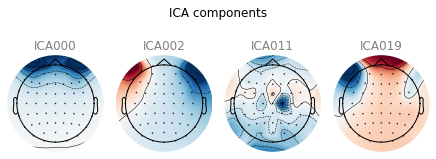

In [12]:
# ICA
n_components = 60 - len(raw.info['bads'])
raw.info['bads'] = []
#raw.filter(*filter_)
ica = mne.preprocessing.ICA(n_components=n_components).fit(raw)
ica.exclude, _ = ica.find_bads_eog(raw)
ica.plot_components(ica.exclude, outlines="skirt");



In [13]:
if sub == 1:
    ica_exclude = []
elif sub == 2:
    ica_exclude = [2,9]
elif sub == 3:
    ica_exclude = [0,1,8]
elif sub == 4:
    ica_exclude = [0, 1, 5]
elif sub == 5:
    ica_exclude = [1,2,3,6]
elif sub == 6:
    ica_exclude = [1,3]
elif sub == 7:
    ica_exclude = [0, 2,4]
elif sub == 8:
    ica_exclude = []
elif sub == 9:
    ica_exclude = [0, 1, 3, 5, 16]
elif sub == 10:
    ica_exclude = [0, 1, 3]
elif sub == 11:
    ica_exclude = [0, 1, 4, 5]
elif sub == 12:
    ica_exclude = [0,1,3,4]
elif sub == 14:
    ica_exclude = [0, 3, 4, 5]
elif sub == 15:
    ica_exclude = [0, 2, 3, 6]
elif sub == 16:
    ica_exclude = [0, 3, 8, 13]
elif sub == 17:
    ica_exclude = [0, 2, 11]

In [ ]:
print(ica.exclude)
ica.find_bads_eog?

#### Optional: look at all component topographies

In [ ]:
%matplotlib inline
ica.plot_components(inst = raw)
#ica.plot_sources(raw)

#### Optional: look at timecourses of components

In [ ]:
%matplotlib qt
%matplotlib qt

fig = ica.plot_sources(raw)
fig.set_figheight(10)
fig.set_figwidth(15)

#### Optional: look at summary of specific component

In [ ]:
# choose component(s) to inspect: 
comp = [12]
ica.plot_properties(raw, picks = comp)

### Required: reload data and apply new filtering settings

In [15]:
# redo filtering for epoching
del raw

# reload data
raw = mne.io.read_raw_eeglab(raw_datafile, montage, eog=['VEOG', 'HEOG'], preload=True)
mne.io.set_eeg_reference(raw, ['RM'])

# reload events
events = mne.events_from_annotations(raw, event_id = event_id)

if sub == 24: # faulty trigger
    events[0][1929,2] = 50
elif sub == 4:
    events[0][728,2] = 50 # rogue trigger


# crop data again
# crop 10 seconds before the first event
tmin = raw.times[events[0][0,0]]-10
if tmin < 0: # if tmin is negative just set it at the beginning
    tmin = raw.times[0] 
# crop 10 seconds after the last event
tmax = raw.times[events[0][-1,0]]+10
if tmax > raw.times[-1]: # if tmax is bigger then the max time, just take that
    tmax = raw.times[-1]

# crop it
raw.crop(tmin=tmin, tmax=tmax)

# refilter
raw.filter(lp, hp,  fir_design="firwin")
raw, events = raw.resample(sfreq, npad='auto', events=events[0])

raw.drop_channels(["RM"])
    
if sub == 23:
    raw.info['bads'] = ['AF8']
    #raw.interpolate_bads(reset_bads=False, verbose=False)
elif sub == 26:
    raw.info['bads'] = ['FPZ', 'FP2']
    #raw.interpolate_bads(reset_bads=False, verbose=False)
elif sub == 30:
    raw.info['bads'] = ['P2']
elif sub == 17:
    raw.info['bads'] = ['OZ']

raw = raw.interpolate_bads(reset_bads=True, verbose=False)

Reading /Users/yvonnefonken/Documents/Oxford/Research Projects/EEG/Catch4Critters_2019/EEGdata/S17/s17_Catch4Critters.fdt
Reading 0 ... 4738199  =      0.000 ...  4738.199 secs...
Applying a custom EEG reference.
Used Annotations descriptions: ['101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '20.0', '21.0', '22.0', '23.0', '24.0', '245.0', '3.0', '30.0', '31.0', '32.0', '33.0', '34.0', '4.0', '5.0', '50.0', '6.0', '7.0']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

In [ ]:
raw.info['bads']

## Detect eye-movements around target presentation

### Required: create epochs for eye-artifact rejection

In [16]:
# Epoch data WITHOUT removing eye-artifact ICA's
tmin = -1.0
tmax = 3.0

keys     = ['Blimp']

values   = [ 50]

event_ids_target = dict(zip(keys, values))

epochsEye = mne.Epochs(raw, events, event_ids_target, tmin=tmin, tmax=tmax, preload=True, metadata = df)#, metadata = df) # set reject to None because we will do autoreject

epochsEye.events[:,1] = range(1,len(epochsEye.events)+1) #Fill that weird zeros column with the trial numbers

#epochsEye.apply_baseline((None, 0))
    
#

576 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 45 columns
0 projection items activated
Loading data for 576 events and 1001 original time points ...
0 bad epochs dropped


In [ ]:
raw._data.shape

### Required: plot eye movement data to determine thresholds

In [ ]:
raw.info['ch_names']

(576, 63, 1001)


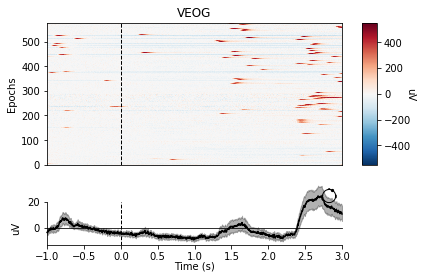

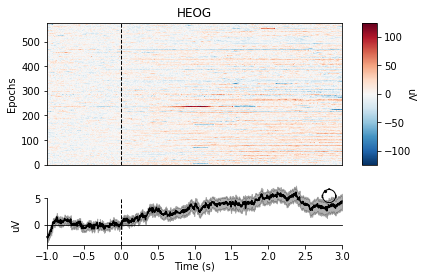

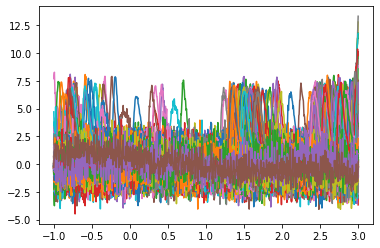

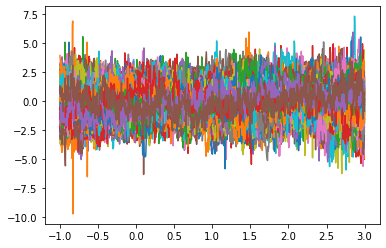

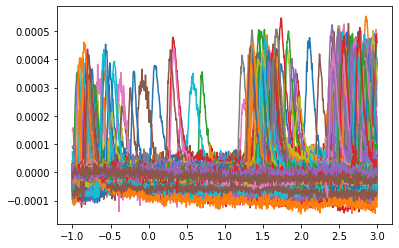

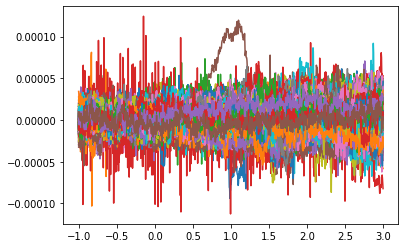

In [19]:
import scipy as sp
%matplotlib inline

# Identify trials with eye-blinks sufficiently close to target
print(epochsEye._data.shape)

verChan = 61
horChan = 62
# Plot vertical EOG channel (eye-blinks)
epochsEye.plot_image(picks = verChan)

# Plot horizontal EOG channel
epochsEye.plot_image(picks = horChan)

# Hack into plotting single trials: 

times = np.arange(epochsEye.tmin, epochsEye.tmax, (epochsEye.tmax - epochsEye.tmin) / (epochsEye._data.shape[2])  ) # Note 481 is downsampling dependent
plt.figure()
plt.plot(times[:epochsEye._data.shape[2]], sp.stats.zscore(np.matrix.transpose(np.squeeze(epochsEye._data[:,verChan, :])), axis = 0))

plt.figure()
plt.plot(times[:epochsEye._data.shape[2]], sp.stats.zscore(np.matrix.transpose(np.squeeze(epochsEye._data[:,horChan, :])), axis = 0))

plt.figure()
plt.plot(times[:epochsEye._data.shape[2]], np.matrix.transpose(np.squeeze(epochsEye._data[:,verChan, :])))

plt.figure()
plt.plot(times[:epochsEye._data.shape[2]], np.matrix.transpose(np.squeeze(epochsEye._data[:,horChan, :])))




### Required: detect eye movements based on set threshold

In [17]:
if sub == 23:
    verThreshold = 0.0002
    horThreshold = 0.0002
elif sub == 1:
    verThreshold = 0.0002
    horThreshold = 0.0002
elif sub == 2:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 3:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 4:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 5:
    verThreshold = 0.0003
    horThreshold = 0.0002
elif sub == 6:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 7:
    verThreshold = 0.0001
    horThreshold = 0.0001
elif sub == 9:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 10:
    verThreshold = 0.00025
    horThreshold = 0.00012
elif sub ==11:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 12:
    verThreshold = 0.0002
    horThreshold = 0.0002
elif sub == 13:
    verThreshold = 0
    horThreshold = 0
elif sub == 14:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 15:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 16:
    verThreshold = 0.00025
    horThreshold = 0.00025
elif sub == 17:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 18:
    verThreshold = 0.0025
    horThreshold = 0.0001
elif sub == 19:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 20:
    verThreshold = 0.0003
    horThreshold = 0.0001
elif sub == 21:
    verThreshold = 0.0004
    horThreshold = 0.0002
elif sub == 22:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 24:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 25:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 26:
    verThreshold = 0.0004
    horThreshold = 0.0002
elif sub == 27:
    verThreshold = 0.0005
    horThreshold = 0.0002
elif sub == 29:
    verThreshold = 0.0002
    horThreshold = 0.0001
elif sub == 30:
    verThreshold = 0.0001
    horThreshold = 0.0001
    

In [20]:
# Set thresholds, remove trials, check data -- based on zscored data

#verThreshold = 0.0002 # S18; 4/4 S19: 4.5, 4 S20: 3.7/4 S21: 3.5/6 (heavy blinker) S22: 4.5/5 S23: 6/6 S24: 5/5 S25: 4/5 S26: 5/5 S27: 4.5/5 S29: 5/5 S30: 5/5 
#horThreshold = 0.0002

delay1 = 0.8
delay2 = 2.0

verTWin = [-0.4, 0.3]
horTWin = [-0.4, 0.1] # some subjects do move their eyes after target presentation -- decide what to do (exclude subject or keep?)

verTind1 = (times > (verTWin[0] +delay1)) *(times < (verTWin[1] +delay1))
horTind1 = (times > (horTWin[0] + delay1)) *(times < (horTWin[1]+ delay1))

verTind2 = (times > (verTWin[0] +delay2)) *(times < (verTWin[1] +delay2))
horTind2 = (times > (horTWin[0] + delay2)) *(times < (horTWin[1]+ delay2))

eyeArtifactInd = []

delayInd = list((df['Delay'] == 2000.0))

for i in range(epochsEye._data.shape[0]):
    
    if i < 288: 
        
        # check both delays
        
        # Find eye blinks
        if max(np.absolute(np.squeeze(epochsEye._data[i,verChan, verTind1]))) > verThreshold:
            #save i
            eyeArtifactInd.append(i)


        # find eye movements 
        if max(np.absolute(np.squeeze(epochsEye._data[i, horChan, horTind1]))) > horThreshold:
            # save i
            eyeArtifactInd.append(i)
            
        # Find eye blinks
        if max(np.absolute(np.squeeze(epochsEye._data[i,verChan, verTind2]))) > verThreshold:
            #save i
            eyeArtifactInd.append(i)


        # find eye movements 
        if max(np.absolute(np.squeeze(epochsEye._data[i, horChan, horTind2]))) > horThreshold:
            # save i
            eyeArtifactInd.append(i)
            
    else: 
        
        if delayInd[i]:
            # Find eye blinks
            if max(np.absolute(np.squeeze(epochsEye._data[i,verChan, verTind1]))) > verThreshold:
                #save i
                eyeArtifactInd.append(i)


            # find eye movements 
            if max(np.absolute(np.squeeze(epochsEye._data[i, horChan, horTind1]))) > horThreshold:
                # save i
                eyeArtifactInd.append(i)
            # check early timewin
        else:
            # check late timewin
            # Find eye blinks
            # Find eye blinks
            # Find eye blinks
            if max(np.absolute(np.squeeze(epochsEye._data[i,verChan, verTind2]))) > verThreshold:
                #save i
                eyeArtifactInd.append(i)


            # find eye movements 
            if max(np.absolute(np.squeeze(epochsEye._data[i, horChan, horTind2]))) > horThreshold:
                # save i
                eyeArtifactInd.append(i)
            

            
print(np.unique(eyeArtifactInd))
len(np.unique(eyeArtifactInd))



[ 22 223 229]


3

In [21]:
ica_exclude

[0, 2, 11]

In [ ]:
# Check data post removal

# Remove bad trials
epochsEye.drop(eyeArtifactInd)

# Plot vertical EOG channel (eye-blinks)
epochsEye.plot_image(picks = 61)

# Plot horizontal EOG channel
epochsEye.plot_image(picks = 62)

In [22]:
# Remove eye-artifact ICA's from raw data, re-epoch
#del epochsEye # Clear memory

tmin = -3.0
tmax = 4.0 # make it long enough sufficient for TFR analyses




keys     = ['Blimp']

values   = [ 50]

event_ids_target = dict(zip(keys, values))

# Remove bad ica

raw2 = ica.apply(raw, exclude=ica_exclude).pick_types(eeg=True)
#raw2 = raw2.interpolate_bads(reset_bads=True, verbose=False)

# Epoch data

epochs = mne.Epochs(raw2, events, event_ids_target, tmin=tmin, tmax=tmax, preload=True, metadata = df) # set reject to None because we will do autoreject

epochs.events[:,1] = range(1,len(epochs.events)+1) #Fill that weird zeros column with the trial numbers

epochs.apply_baseline((None, 0))



Transforming to ICA space (59 components)
Zeroing out 4 ICA components
576 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 45 columns
0 projection items activated
Loading data for 576 events and 1751 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Epochs  |   576 events (all good), -3 - 4 sec, baseline [None, 0], ~469.5 MB, data loaded, with metadata,
 'Blimp': 576>

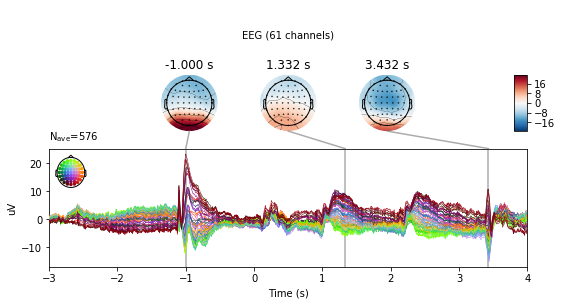

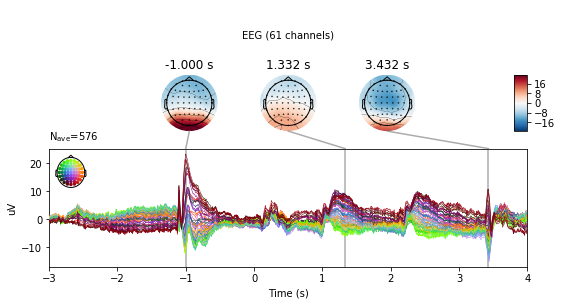

In [23]:
# Look at data
ep = epochs.average()
ep.plot_joint()

In [ ]:
raw2.info['bads'] = ['P2']
raw2 = raw.interpolate_bads(reset_bads=True, verbose=False)

In [ ]:
raw.info['ch_names']

In [ ]:
# Remove bad channels -- do manually based on above plots -- write code to reject bad channels based on variance, use sub 30 as example
%matplotlib qt
%matplotlib qt
raw.plot()

In [ ]:
if sub == 23:
    epochs.drop_channels('AF8')
elif sub == 26:
    epochs.drop_channels(['FPZ', 'FP2'])
elif sub == 30:
    epochs.drop_channels('P2')
elif sub ==17:
    epochs.drop_channels('OZ')

Dropped 3 epochs
26 trials discarded


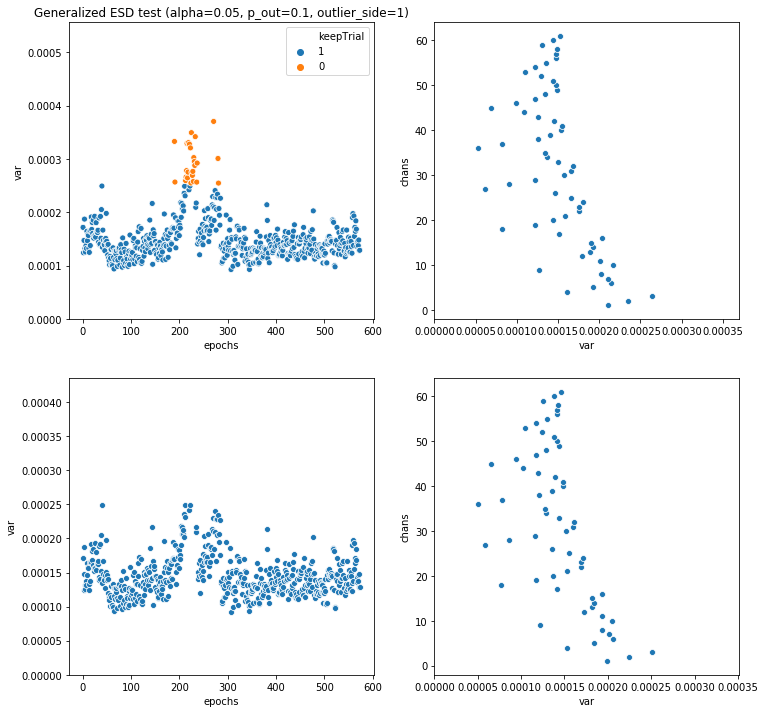

In [26]:
# Remove outlier trials -- can only run once, otherwise you start to remove more trials!

# Drop eye movement trials
epochs.drop(eyeArtifactInd)

axis, keep_idx = plot_AR(epochs, method='gesd')

epochs = epochs[keep_idx[0]]

In [27]:
# Save ERP data
fileName = 'dataClean-epo.fif'
saveFile = os.path.join(homeDir, subjects[subInd], fileName)
epochs.save(saveFile, overwrite = False, verbose = True)



In [ ]:
epochs.save?

In [ ]:
del epochsEye
del raw
del raw2

In [ ]:
epochs.info['ch_names'] 

## Do TFR  -- scratch this for now. Saving data suitable for TFR and ERP analyses instead. 

In [ ]:
# Re-load and re-filter data
subInd = sub -1

raw_datafile = os.path.join(homeDir, subjects[subInd], filenames[subInd])
rawTFR = mne.io.read_raw_eeglab(raw_datafile, montage, eog=['VEOG', 'HEOG'], preload=True)
mne.io.set_eeg_reference(rawTFR, ['RM'])

# Reload events (which are downsampled earlier)

# Housekeeping, filtering, and downsampling
    
# Find the first even with a real trigger code (this is because of the impedence trigger)
#f = np.min(np.where(events[:,-1] < 256))

# crop 10 seconds before the first event
tmin = rawTFR.times[eventsTFR[0][0,0]]-10
if tmin < 0: # if tmin is negative just set it at the beginning
    tmin = rawTFR.times[0] 
# crop 10 seconds after the last event
tmax = rawTFR.times[eventsTFR[0][-1,0]]+10
if tmax > rawTFR.times[-1]: # if tmax is bigger then the max time, just take that
    tmax = rawTFR.times[-1]

# crop it
rawTFR.crop(tmin=tmin, tmax=tmax)

rawTFR.filter(lpTF, hpTF,  fir_design="firwin") 
#rawTFR, events = rawTFR.resample(sfreq, npad='auto', events=events[0]) # Resample later

rawTFR.drop_channels(["RM"])





In [ ]:
# Epoch and Remove ica and bad trials

# Remove eye-artifact ICA's from raw data, re-epoch
#del epochsEye # Clear memory

tmin = -2.0
tmax = 3.0




keys     = ['Blimp']

values   = [ 50]

event_ids_target = dict(zip(keys, values))

# Remove bad ica

rawTFR2 = ica.apply(rawTFR, exclude=ica.exclude).pick_types(eeg=True)

# Epoch data

epochsTFR = mne.Epochs(rawTFR2, eventsTFR[0], event_ids_target, tmin=tmin, tmax=tmax, preload=True, metadata = df) # set reject to None because we will do autoreject

epochsTFR.events[:,1] = range(1,len(epochsTFR.events)+1) #Fill that weird zeros column with the trial numbers

epochsTFR.apply_baseline((None, 0))

# drop eye movement excluded trials
epochsTFR.drop(eyeArtifactInd)
# drop high variance trials
epochsTFR = epochsTFR[keep_idx[0]] # check whether this also updates df -- checked, it does


In [ ]:
# Implement TFR magic
frequencies = np.logspace(*np.log10([3, 45]), num = 15)  # define frequencies of interest
n_cycles = frequencies / 5.  # different number of cycle per frequency
Fs = rawTFR.info['sfreq']  # sampling in Hz
decim = 10
data = epochsTFR.get_data()
print(data.shape)

from mne.time_frequency import tfr_morlet
power = tfr_morlet(epochsTFR, freqs=frequencies,n_cycles=n_cycles, use_fft=False, decim=decim, zero_mean=True, average = True, return_itc = False)
print(power._data.shape)
print ('done!')


In [ ]:
power._data.shape

In [ ]:
# Check data

power.plot_topomap(ch_type='EEG', tmin=0.6, tmax=1.0, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Alpha')

power.plot_topomap(ch_type='EEG', tmin=0.8, tmax=1.5, fmin=13, fmax=30,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta')

In [ ]:
# Save TFR 
fileName = 'testTFR-epo.fif'
saveFile = os.path.join(homeDir, subjects[subInd], fileName)
power.save(saveFile, overwrite = False, verbose = True)

In [24]:
def gesd(x, alpha = 0.05, p_out = .1, outlier_side = 0):
    import numpy as np
    import scipy.stats
    import copy
    
    '''
    Detect outliers using Generalizes ESD test
    based on the code from Romesh Abeysuriya implementation for OSL
      
    Inputs:
    - x : Data set containing outliers - should be a np.array 
    - alpha : Significance level to detect at (default = .05)
    - p_out : percent of max number of outliers to detect (default = 10% of data set)
    - outlier_side : Specify sidedness of the test
        - outlier_side = -1 -> outliers are all smaller
        - outlier_side = 0 -> outliers could be small/negative or large/positive (default)
        - outlier_side = 1 -> outliers are all larger
        
    Outputs
    - idx : Logicial array with True wherever a sample is an outlier
    - x2 : input array with outliers removed
    
    For details about the method, see
    B. Rosner (1983). Percentage Points for a Generalized ESD Many-outlier Procedure, Technometrics 25(2), pp. 165-172.
    http://www.jstor.org/stable/1268549?seq=1
    '''

    if outlier_side == 0:
        alpha = alpha/2
    
    
    if type(x) != np.ndarray:
        x = np.asarray(x)

    n_out = int(np.ceil(len(x)*p_out))

    if any(~np.isfinite(x)):
        #Need to find outliers only in non-finite x
        y = np.where(np.isfinite(x))[0] # these are the indexes of x that are finite
        idx1, x2 = gesd(x[np.isfinite(x)], alpha, n_out, outlier_side)
        # idx1 has the indexes of y which were marked as outliers
        # the value of y contains the corresponding indexes of x that are outliers
        idx = [False] * len(x)
        idx[y[idx1]] = True

    n      = len(x)
    temp   = x
    R      = np.zeros((1, n_out))[0]
    rm_idx = copy.deepcopy(R)
    lam    = copy.deepcopy(R)

    for j in range(0,int(n_out)):
        i = j+1
        if outlier_side == -1:
            rm_idx[j] = np.nanargmin(temp)
            sample    = np.nanmin(temp)
            R[j]      = np.nanmean(temp) - sample
        elif outlier_side == 0:
            rm_idx[j] = int(np.nanargmax(abs(temp-np.nanmean(temp))))
            R[j]      = np.nanmax(abs(temp-np.nanmean(temp)))
        elif outlier_side == 1: 
            rm_idx[j] = np.nanargmax(temp)
            sample    = np.nanmax(temp)
            R[j]      = sample - np.nanmean(temp)
        
        R[j] = R[j] / np.nanstd(temp)
        temp[int(rm_idx[j])] = np.nan
        
        p = 1-alpha/(n-i+1)
        t = scipy.stats.t.ppf(p,n-i-1)
        lam[j] = ((n-i) * t) / (np.sqrt((n-i-1+t**2)*(n-i+1)))
    
    #And return a logical array of outliers
    idx = np.zeros((1,n))[0]
    idx[np.asarray(rm_idx[range(0,np.max(np.where(R>lam))+1)],int)] = np.nan
    idx = ~np.isfinite(idx)
    
    x2 = x[~idx]

        
    return idx, x2



In [25]:
def plot_AR(epochs, method = 'gesd', zthreshold = 1.5, p_out = .1, alpha = .05, outlier_side = 1):
    import seaborn as sns
    import pandas as pd
    import scipy.stats

    #Get data, variance, number of trials, and number of channels
    dat     = epochs.get_data()
    var     = np.var(dat, 2)
    ntrials = np.shape(dat)[0]
    nchan   = len(epochs.ch_names)

    #set up the axis for the plots
    x_epos  = range(1,ntrials+1)
    y_epos  = np.mean(var,1)
    y_chans = range(1,nchan+1)
    x_chans = np.mean(var,0)

    #scale the variances
    y_epos  = [x * 10**6 for x in y_epos]
    x_chans = [x * 10**6 for x in x_chans]

    #Get the zScore
    zVar = scipy.stats.zscore(y_epos)

    #save everything in the dataFrame
    df_epos           = pd.DataFrame({'var': y_epos, 'epochs': x_epos, 'zVar': zVar})
    df_chans          = pd.DataFrame({'var': x_chans, 'chans': y_chans})
    
    # Apply the artefact rejection method
    if method == 'gesd':
        idx,x2            = gesd(y_epos, p_out=p_out, alpha=alpha, outlier_side=outlier_side) #use the gesd to find outliers (idx is the index of the outlier trials)
        keepTrials        = np.ones((1,ntrials))[0]
        keepTrials[idx]   = 0
        title = 'Generalized ESD test (alpha=' + str(alpha) + ', p_out=' + str(p_out) + ', outlier_side=' + str(outlier_side) + ')'
    elif method == 'zScore':
        keepTrials        = np.where(df_epos['zVar'] > zthreshold, 0, 1)
        title = 'ZVarience threshold of ' + str(zthreshold)
    elif method == 'none':
        title = 'no additional artefact rejection '
        keepTrials        = np.ones((1,ntrials))[0]
    
    df_epos['keepTrial'] = keepTrials
    df_keeps = df_epos[df_epos['keepTrial'] == 1]
    print(str(ntrials - len(df_keeps)) + ' trials discarded')
    
    # get the clean data
    keep_idx    = np.asarray(np.where(keepTrials),int)
    clean_dat    = np.squeeze(dat[keep_idx])
    
    #recalculate the var for chan
    clean_var    = np.var(clean_dat, 2)
    x_chans_c    = np.mean(clean_var,0)
    x_chans_c    = [x * 10**6 for x in x_chans_c]

    df_chans_c   = pd.DataFrame({'var': x_chans_c, 'chans': y_chans})
    
    
    # Plot everything
    fig, axis = plt.subplots(2, 2, figsize=(12, 12))
    axis[0,0].set_ylim([0, max(y_epos) + min(y_epos)*2])
    axis[0,1].set_xlim([0, max(x_chans)+ min(x_chans)*2])
    axis[1,0].set_ylim([0, max(df_keeps['var'])+ min(df_keeps['var'])*2])
    axis[1,1].set_xlim([0, max(x_chans_c)+ min(x_chans_c)*2])

    axis[0,0].set_title(title)
    sns.scatterplot(x = 'epochs', y = 'var', hue = 'keepTrial', hue_order = [1,0], ax = axis[0,0], data = df_epos)
    sns.scatterplot(x = 'var', y = 'chans', ax = axis[0,1], data = df_chans)
    sns.scatterplot(x = 'epochs', y = 'var', ax = axis[1,0], data =df_keeps)
    sns.scatterplot(x = 'var', y = 'chans', ax = axis[1,1], data = df_chans_c)
    
    
    
    return axis, keep_idx

